In [1]:
%matplotlib inline
import sys
sys.path.append("..")

In [2]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.tablogger import TabLogger

In [24]:
# load the file from the experiments directories

prog = re.compile("Params: (?P<params>\d+\.\d+e\+\d+)")

df = pd.DataFrame({})
# for run in range(0, 10):
#     logfpath = os.path.join(
#         "..",
#         "experiments",
#         "adaptive_constrained-cifar100-vgg19_bn-run{}".format(run),
#         "logs",
#         "info.log"
#     )

#     tabfpath = os.path.join(
#         "..",
#         "experiments",
#         "adaptive_constrained-cifar100-vgg19_bn-run{}".format(run),
#         "out",
#         "epoch.out"
#     )
#     tabf = TabLogger(tabfpath, resume=True)
#     tabf.close()
#     dd = tabf.numbers
    
#     with open(logfpath, "r") as logf:
#         for line in logf:
#             match = prog.search(line)
#             if match:
#                 dd["Params"] = dd.get("Params", []) + [float(match.group("params"))]

#     dd["Run"] = ["Run{}".format(run)] * len(dd["Params"])
#     df = pd.concat([df, pd.DataFrame(dd)])


# Display run 1 only, combine losses
logfpath = os.path.join(
    "..",
    "experiments",
    "adaptive_constrained-cifar100-vgg19_bn-run{}".format(run),
    "logs",
    "info.log"
)

tabfpath = os.path.join(
    "..",
    "experiments",
    "adaptive_constrained-cifar100-vgg19_bn-run{}".format(run),
    "out",
    "epoch.out"
)
tabf = TabLogger(tabfpath, resume=True)
tabf.close()

ac_dd = {}
dd = {}
for idx, epoch in enumerate(tabf.numbers["Epoch"]):
    dd["Epoch"] = dd.get("Epoch", []) + [int(epoch)]
    dd["Loss Type"] = dd.get("Loss Type", []) + ["Train Task Loss"]
    dd["Loss"] = dd.get("Loss", []) + [float(tabf.numbers["Train Task Loss"][idx])]

    dd["Epoch"] = dd.get("Epoch", []) + [int(epoch)]
    dd["Loss Type"] = dd.get("Loss Type", []) + ["Train KD Loss"]
    dd["Loss"] = dd.get("Loss", []) + [float(tabf.numbers["Train KD Loss"][idx])]

    if float(tabf.numbers["Train Mask Loss"][idx]) > 0:
        dd["Epoch"] = dd.get("Epoch", []) + [int(epoch)]
        dd["Loss Type"] = dd.get("Loss Type", []) + ["Train Mask Loss"]
        dd["Loss"] = dd.get("Loss", []) + [float(tabf.numbers["Train Mask Loss"][idx])]

    ac_dd["Epoch"] = ac_dd.get("Epoch", []) + [int(epoch)]
    ac_dd["Acc Type"] = ac_dd.get("Acc Type", []) + ["Train Acc"]
    ac_dd["Acc"] = ac_dd.get("Acc", []) + [float(tabf.numbers["Train Acc"][idx])]

    ac_dd["Epoch"] = ac_dd.get("Epoch", []) + [int(epoch)]
    ac_dd["Acc Type"] = ac_dd.get("Acc Type", []) + ["Eval Acc"]
    ac_dd["Acc"] = ac_dd.get("Acc", []) + [float(tabf.numbers["Eval Acc"][idx])]

parm_dd = {}
with open(logfpath, "r") as logf:
    epoch = 0
    for line in logf:
        match = prog.search(line)
        if match:
            parm_dd["Epoch"] = parm_dd.get("Epoch", []) + [int(epoch)]
            parm_dd["Params"] = parm_dd.get("Params", []) + [float(match.group("params"))]
            epoch += 1

loss_df = pd.DataFrame(dd)
acc_df = pd.DataFrame(ac_dd)
param_df = pd.DataFrame(parm_dd)
# dd["Run"] = ["Run{}".format(run)] * len(dd["Params"])
# df = pd.concat([df, pd.DataFrame(dd)])

In [25]:
print(loss_df)
print(acc_df)
print(param_df)


      Epoch        Loss Type      Loss
0         0  Train Task Loss  0.586575
1         0    Train KD Loss  0.357425
2         0  Train Mask Loss  0.966361
3         1  Train Task Loss  0.635223
4         1    Train KD Loss  0.383108
...     ...              ...       ...
1215    562    Train KD Loss  0.424581
1216    563  Train Task Loss  0.128842
1217    563    Train KD Loss  0.421887
1218    564  Train Task Loss  0.130641
1219    564    Train KD Loss  0.420186

[1220 rows x 3 columns]
      Epoch   Acc Type     Acc
0         0  Train Acc  98.218
1         0   Eval Acc  69.510
2         1  Train Acc  97.998
3         1   Eval Acc  71.570
4         2  Train Acc  98.398
...     ...        ...     ...
1125    562   Eval Acc  70.260
1126    563  Train Acc  99.642
1127    563   Eval Acc  70.090
1128    564  Train Acc  99.636
1129    564   Eval Acc  70.040

[1130 rows x 3 columns]
     Epoch      Params
0        0  18400000.0
1        1  17000000.0
2        2  17000000.0
3        3  170000

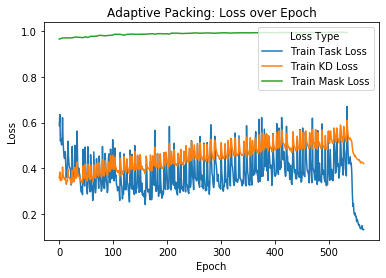

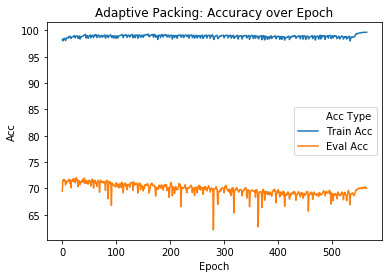

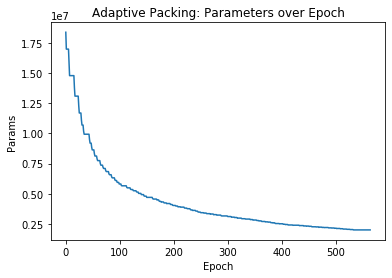

In [28]:
# plot in Seaborn
# plt.figure(figsize=(15, 6))


ml = sns.lineplot(
    x="Epoch", y="Loss", hue="Loss Type", data=loss_df
)
ml.set(title="Adaptive Packing: Loss over Epoch")
plt.savefig("adaptive_packing-loss-cifar100-vgg19_bn.png", dpi=200)
# plt.savefig("unconstrained_pruning-train_mask_loss-cifar100-vgg19_bn.png", dpi=200)
plt.show()


ac = sns.lineplot(
    x="Epoch", y="Acc", hue="Acc Type", data=acc_df
)
ac.set(title="Adaptive Packing: Accuracy over Epoch")
plt.savefig("adaptive_packing-accuracy-cifar100-vgg19_bn.png", dpi=200)
# plt.savefig("unconstrained_pruning-train_kd_loss-cifar100-vgg19_bn.png", dpi=200)
plt.show()


pm = sns.lineplot(
    x="Epoch", y="Params", data=param_df
)
pm.set(title="Adaptive Packing: Parameters over Epoch")
plt.savefig("adaptive_packing-unmasked_parameters-cifar100-vgg19_bn.png", dpi=200)
plt.show()


# ta = sns.relplot(
#     x="Epoch", y="Train Acc", hue="Mask Reg", data=df,
#     col_order=[0.0001, 0.00001, 0.000001], kind="line", palette="colorblind",
#     col="LR", facet_kws=dict(sharex=False, sharey=False),
# )
# plt.show()
# ea = sns.relplot(
#     x="Epoch", y="Eval Acc", hue="Mask Reg", data=df,
#     col_order=[0.0001, 0.00001, 0.000001], kind="line", palette="colorblind",
#     col="LR", facet_kws=dict(sharex=False, sharey=False),
# )
# g.set_yscale("log")
# plt.savefig("eval_acc-cifar100-vgg19_bn-full.png", dpi=200)
plt.show()

In [31]:
# get final VGG configurations

prog = re.compile("New VGG configuration: \[(?P<conf>.*)]")
for run in range(0, 10):
    logfpath = os.path.join(
        "..",
        "experiments",
        "adaptive_constrained-cifar100-vgg19_bn-run{}".format(run),
        "logs",
        "info.log"
    )

    with open(logfpath, "r") as logf:
        best_vgg_configuration = None
        for line in logf:
            match = prog.search(line)
            if match:
                best_vgg_configuration = match.group("conf")
    print(run, "[{}]".format(best_vgg_configuration))


0 [22, 30, 'M', 73, 59, 'M', 157, 164, 163, 109, 'M', 285, 251, 76, 12, 'M', 20, 26, 70, 122, 'M']
1 [20, 34, 'M', 69, 63, 'M', 170, 165, 176, 116, 'M', 286, 226, 73, 9, 'M', 16, 27, 68, 116, 'M']
2 [22, 30, 'M', 74, 65, 'M', 155, 172, 173, 106, 'M', 282, 234, 76, 11, 'M', 21, 31, 77, 125, 'M']
3 [23, 28, 'M', 75, 59, 'M', 166, 162, 160, 106, 'M', 292, 233, 83, 15, 'M', 20, 31, 73, 129, 'M']
4 [21, 29, 'M', 75, 64, 'M', 169, 178, 173, 111, 'M', 278, 216, 87, 14, 'M', 22, 23, 73, 122, 'M']
5 [22, 34, 'M', 67, 60, 'M', 153, 174, 174, 103, 'M', 284, 241, 76, 13, 'M', 19, 26, 78, 130, 'M']
6 [19, 31, 'M', 75, 70, 'M', 159, 176, 166, 113, 'M', 269, 233, 79, 11, 'M', 21, 28, 64, 126, 'M']
7 [24, 30, 'M', 77, 63, 'M', 159, 166, 173, 108, 'M', 274, 234, 88, 12, 'M', 21, 30, 80, 120, 'M']
8 [27, 34, 'M', 83, 67, 'M', 163, 172, 167, 112, 'M', 269, 235, 72, 13, 'M', 19, 27, 77, 134, 'M']
9 [19, 35, 'M', 78, 69, 'M', 154, 175, 163, 104, 'M', 283, 236, 83, 9, 'M', 24, 34, 70, 125, 'M']
